In [3]:
######################################################
## Hierarchical clustering of stocks         #########
######################################################
import warnings
warnings.filterwarnings('ignore')

# you used k-means clustering to cluster companies according to their stock price movements. 
# Now, you'll perform hierarchical clustering of the companies. 
# You are given a NumPy array of price movements movements, where the rows correspond to companies, 
# and a list of the company names companies. 

# SciPy hierarchical clustering doesn't fit into a sklearn pipeline, 
# so you'll need to use the normalize() function from sklearn.preprocessing instead of Normalizer.

import pandas as pd
import numpy as np

movements = pd.read_csv("investment.csv")

display(movements.head(), '\n')

#a list companies of the company names is available.
companies = movements.iloc[:,0].tolist()
display(companies)

movements=np.array(movements)
print(movements[:5], '\n')
movements = np.delete(movements, 0, axis=1)
print(movements[:5])


,Unnamed: 0,2010-01-04,2010-01-05,2010-01-06,2010-01-07,2010-01-08,2010-01-11,2010-01-12,2010-01-13,2010-01-14,...,2013-10-16,2013-10-17,2013-10-18,2013-10-21,2013-10-22,2013-10-23,2013-10-24,2013-10-25,2013-10-28,2013-10-29
0,Apple,0.580000,-0.220005,-3.409998,-1.170000,1.680011,-2.689994,-1.469994,2.779997,-0.680003,...,0.320008,4.519997,2.899987,9.590019,-6.540016,5.959976,6.910011,-5.359962,0.840019,-19.589981
1,AIG,-0.640002,-0.650000,-0.210001,-0.420000,0.710001,-0.200001,-1.130001,0.069999,-0.119999,...,0.919998,0.709999,0.119999,-0.480000,0.010002,-0.279998,-0.190003,-0.040001,-0.400002,0.660000
2,Amazon,-2.350006,1.260009,-2.350006,-2.009995,2.960006,-2.309997,-1.640007,1.209999,-1.790001,...,2.109985,3.699982,9.570008,-3.450013,4.820008,-4.079986,2.579986,4.790009,-1.760009,3.740021
3,American express,0.109997,0.000000,0.260002,0.720002,0.190003,-0.270001,0.750000,0.300004,0.639999,...,0.680001,2.290001,0.409996,-0.069999,0.100006,0.069999,0.130005,1.849999,0.040001,0.540001
4,Boeing,0.459999,1.770000,1.549999,2.690003,0.059997,-1.080002,0.360000,0.549999,0.530002,...,1.559997,2.480003,0.019997,-1.220001,0.480003,3.020004,-0.029999,1.940002,1.130005,0.309998


'\n'

['Apple',
 'AIG',
 'Amazon',
 'American express',
 'Boeing',
 'Bank of America',
 'British American Tobacco',
 'Canon',
 'Caterpillar',
 'Colgate-Palmolive',
 'ConocoPhillips',
 'Cisco',
 'Chevron',
 'DuPont de Nemours',
 'Dell',
 'Ford',
 'General Electrics',
 'Google/Alphabet',
 'Goldman Sachs',
 'GlaxoSmithKline',
 'Home Depot',
 'Honda',
 'HP',
 'IBM',
 'Intel',
 'Johnson & Johnson',
 'JPMorgan Chase',
 'Kimberly-Clark',
 'Coca Cola',
 'Lookheed Martin',
 'MasterCard',
 'McDonalds',
 '3M',
 'Microsoft',
 'Mitsubishi',
 'Navistar',
 'Northrop Grumman',
 'Novartis',
 'Pepsi',
 'Pfizer',
 'Procter Gamble',
 'Philip Morris',
 'Royal Dutch Shell',
 'SAP',
 'Schlumberger',
 'Sony',
 'Sanofi-Aventis',
 'Symantec',
 'Toyota',
 'Total',
 'Taiwan Semiconductor Manufacturing',
 'Texas instruments',
 'Unilever',
 'Valero Energy',
 'Walgreen',
 'Wells Fargo',
 'Wal-Mart',
 'Exxon',
 'Xerox',
 'Yahoo']

[['Apple' 0.579999999999984 -0.220004999999986 ... -5.359962
  0.840018999999984 -19.589981]
 ['AIG' -0.640002000000003 -0.650000000000002 ... -0.0400009999999966
  -0.400002000000001 0.659999999999997]
 ['Amazon' -2.35000600000001 1.260009 ... 4.790009 -1.76000899999997
  3.74002100000001]
 ['American express' 0.109997 0.0 ... 1.849999 0.0400010000000037
  0.540001000000004]
 ['Boeing' 0.459998999999996 1.77 ... 1.94000199999999 1.13000500000001
  0.309998000000007]] 

[[0.579999999999984 -0.220004999999986 -3.409998 ... -5.359962
  0.840018999999984 -19.589981]
 [-0.640002000000003 -0.650000000000002 -0.210001000000002 ...
  -0.0400009999999966 -0.400002000000001 0.659999999999997]
 [-2.35000600000001 1.260009 -2.35000600000001 ... 4.790009
  -1.76000899999997 3.74002100000001]
 [0.109997 0.0 0.260002000000007 ... 1.849999 0.0400010000000037
  0.540001000000004]
 [0.459998999999996 1.77 1.549999 ... 1.94000199999999 1.13000500000001
  0.309998000000007]]


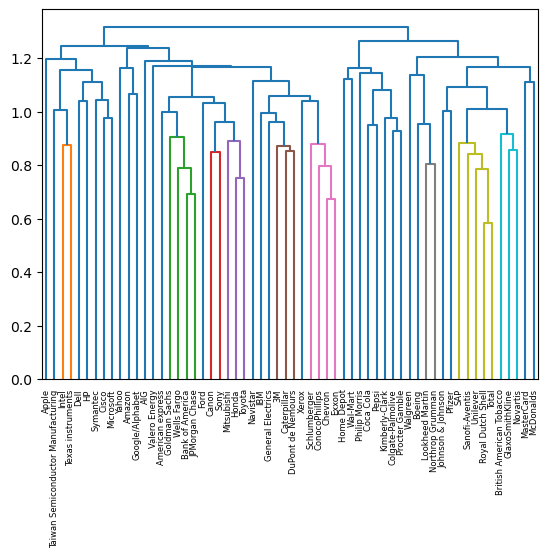

In [4]:
######################################################
## Hierarchical clustering of stocks         #########
######################################################

# Perform the necessary imports
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import normalize

# Rescale the price movements for each stock 
# Normalize the movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method="complete")

# Plot the dendrogram
dendrogram(mergings, labels=companies,leaf_rotation=90, leaf_font_size=6)
plt.show()

# You can produce great visualizations such as this with hierarchical clustering, 
# but it can be used for more than just visualizations. 
